## Stat652_Homework03
- Author: "Rohit Shelar"
- date: "05/02/2021"

### Implementation of DecisionTree in Python and Random Forest on NHANES Dataset

In [ ]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt    
from sklearn.model_selection import train_test_split


In [6]:
import pandas as pd
df = pd.read_csv("NHANES.csv")
print(df.columns)
df.head(3)

Index(['Unnamed: 0', 'ID', 'SurveyYr', 'Gender', 'Age', 'AgeDecade',
       'AgeMonths', 'Race1', 'Race3', 'Education', 'MaritalStatus', 'HHIncome',
       'HHIncomeMid', 'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight',
       'Length', 'HeadCirc', 'Height', 'BMI', 'BMICatUnder20yrs', 'BMI_WHO',
       'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2',
       'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol',
       'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'Diabetes',
       'DiabetesAge', 'HealthGen', 'DaysPhysHlthBad', 'DaysMentHlthBad',
       'LittleInterest', 'Depressed', 'nPregnancies', 'nBabies', 'Age1stBaby',
       'SleepHrsNight', 'SleepTrouble', 'PhysActive', 'PhysActiveDays',
       'TVHrsDay', 'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild',
       'Alcohol12PlusYr', 'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100',
       'Smoke100n', 'SmokeAge', 'Marijuana', 'AgeFirstMarij', 'RegularMarij',
       'AgeRegMarij', 'HardD

,Unnamed: 0,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
0,1,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
1,2,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN
2,3,51624,2009_10,male,34,30-39,409.0,White,NaN,High School,...,No,NaN,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN


#### Data Preprocessing

In [7]:
# Desired columns inclusing column : CompHrsDay
data = df[['Age','SleepHrsNight','AgeMonths', 'HHIncomeMid', 'Poverty', 'HomeRooms', 'Weight', 'Length', 'HeadCirc', 'Height', 'BMI', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1', 'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol', 'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2', 'DiabetesAge', 'DaysPhysHlthBad', 'nPregnancies', 'nBabies', 'Age1stBaby', 'PhysActiveDays','TVHrsDay', 'CompHrsDay','SleepTrouble']]

In [8]:
data.isna().sum()
import numpy as np
data_sleeptrouble = data[~data['SleepTrouble'].isna()]
missing_sleeptrouble = data[data['SleepTrouble'].isna()]
print("Length dataset after removing missing entries in label data: ",len(data_sleeptrouble))
print("Length dataset with missing entries in label data (can be used for prediction):",len(missing_sleeptrouble))

Length dataset after removing missing entries in label data:  7772
Length dataset with missing entries in label data (can be used for prediction): 2228


In [9]:
data_sleeptrouble.isna().sum()

Age                   0
SleepHrsNight        17
AgeMonths          3999
HHIncomeMid         672
Poverty             597
HomeRooms            64
Weight               66
Length             7772
HeadCirc           7772
Height               60
BMI                  72
Pulse               282
BPSysAve            293
BPDiaAve            293
BPSys1              570
BPDia1              570
BPSys2              454
BPDia2              454
BPSys3              437
BPDia3              437
Testosterone       4214
DirectChol          427
TotChol             427
UrineVol1           105
UrineFlow1          532
UrineVol2          6539
UrineFlow2         6541
DiabetesAge        7155
DaysPhysHlthBad     795
nPregnancies       5168
nBabies            5356
Age1stBaby         5888
PhysActiveDays     3896
TVHrsDay           3931
CompHrsDay         3929
SleepTrouble          0
dtype: int64

In [10]:
# Dropping all the columns with more than 50% missing values 
data_sleeptrouble = data_sleeptrouble.drop(columns=['AgeMonths','Length','HeadCirc','Testosterone',
                                                   'UrineVol2','UrineFlow2','DiabetesAge','nPregnancies',
                                                    'nBabies', 'Age1stBaby', 'PhysActiveDays', 'TVHrsDay',
                                                    'CompHrsDay'])

In [11]:
data_sleeptrouble.isna().sum()

Age                  0
SleepHrsNight       17
HHIncomeMid        672
Poverty            597
HomeRooms           64
Weight              66
Height              60
BMI                 72
Pulse              282
BPSysAve           293
BPDiaAve           293
BPSys1             570
BPDia1             570
BPSys2             454
BPDia2             454
BPSys3             437
BPDia3             437
DirectChol         427
TotChol            427
UrineVol1          105
UrineFlow1         532
DaysPhysHlthBad    795
SleepTrouble         0
dtype: int64

In [12]:
# Filling the missing values with mean value of respective columns
data_sleeptrouble_variables =  data_sleeptrouble.drop(columns='SleepTrouble')
data_sleeptrouble_variables = data_sleeptrouble_variables.apply(lambda x: x.fillna(x.mean()),axis=0)
data_sleeptrouble_variables['SleepTrouble'] = pd.Series(data_sleeptrouble['SleepTrouble'])
data_sleeptrouble = data_sleeptrouble_variables
data_sleeptrouble.isna().sum()

Age                0
SleepHrsNight      0
HHIncomeMid        0
Poverty            0
HomeRooms          0
Weight             0
Height             0
BMI                0
Pulse              0
BPSysAve           0
BPDiaAve           0
BPSys1             0
BPDia1             0
BPSys2             0
BPDia2             0
BPSys3             0
BPDia3             0
DirectChol         0
TotChol            0
UrineVol1          0
UrineFlow1         0
DaysPhysHlthBad    0
SleepTrouble       0
dtype: int64

In [13]:
from sklearn import preprocessing
# Clean Dataframe
data_sleeptrouble.head()

,Age,SleepHrsNight,HHIncomeMid,Poverty,HomeRooms,Weight,Height,BMI,Pulse,BPSysAve,...,BPSys2,BPDia2,BPSys3,BPDia3,DirectChol,TotChol,UrineVol1,UrineFlow1,DaysPhysHlthBad,SleepTrouble
0,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
1,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
2,34,4.0,30000.0,1.36,6.0,87.4,164.7,32.22,70.0,113.0,...,114.0,88.0,112.0,82.0,1.29,3.49,352.0,1.018502,0.0,Yes
4,49,8.0,40000.0,1.91,5.0,86.7,168.4,30.57,86.0,112.0,...,108.0,74.0,116.0,76.0,1.16,6.70,77.0,0.094000,0.0,Yes
7,45,8.0,87500.0,5.00,6.0,75.7,166.7,27.24,62.0,118.0,...,118.0,68.0,118.0,60.0,2.12,5.82,106.0,1.116000,0.0,No


In [14]:
print("SleepTrouble Distribution")
data_sleeptrouble['SleepTrouble'].value_counts()

SleepTrouble Distribution


No     5799
Yes    1973
Name: SleepTrouble, dtype: int64

#### Null Model

In [15]:
data_sleeptrouble_actual = data_sleeptrouble['SleepTrouble'].to_list()
data_sleeptrouble_null = ['No' for i in range(len(data_sleeptrouble['SleepTrouble']))]
_y_pred_null=[0 if x == 'No' else 1 for x in data_sleeptrouble_null]
_y_test_null=[0 if x == 'No' else 1 for x in data_sleeptrouble_actual]

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      5799
           1       0.00      0.00      0.00      1973

    accuracy                           0.75      7772
   macro avg       0.37      0.50      0.43      7772
weighted avg       0.56      0.75      0.64      7772

-------------------------- Confusion matrix --------------------------



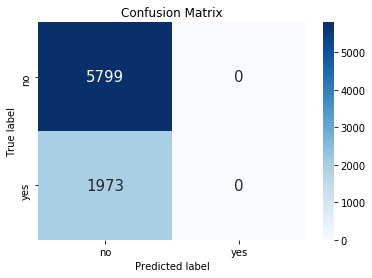

In [16]:
print('----------------------- Classification Report ------------------------\n')
from sklearn import metrics
print(metrics.classification_report(_y_test_null, _y_pred_null))

cf_matrix = confusion_matrix(_y_test_null,_y_pred_null)
ax= plt.subplot()
sns.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15},fmt='',ax = ax)# font size
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no', 'yes'])
ax.yaxis.set_ticklabels(['no', 'yes'])
print('-------------------------- Confusion matrix --------------------------\n')

#### Implementation of DecisionTree in Python 
 C5.0 equivalent

In [81]:
from sklearn.model_selection import train_test_split
_X =  data_sleeptrouble.drop(columns='SleepTrouble')
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(_X)
y = data_sleeptrouble['SleepTrouble'].values
y = np.array([0 if x == 'No' else 1 for x in y])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy",min_samples_split=2, max_leaf_nodes=22)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

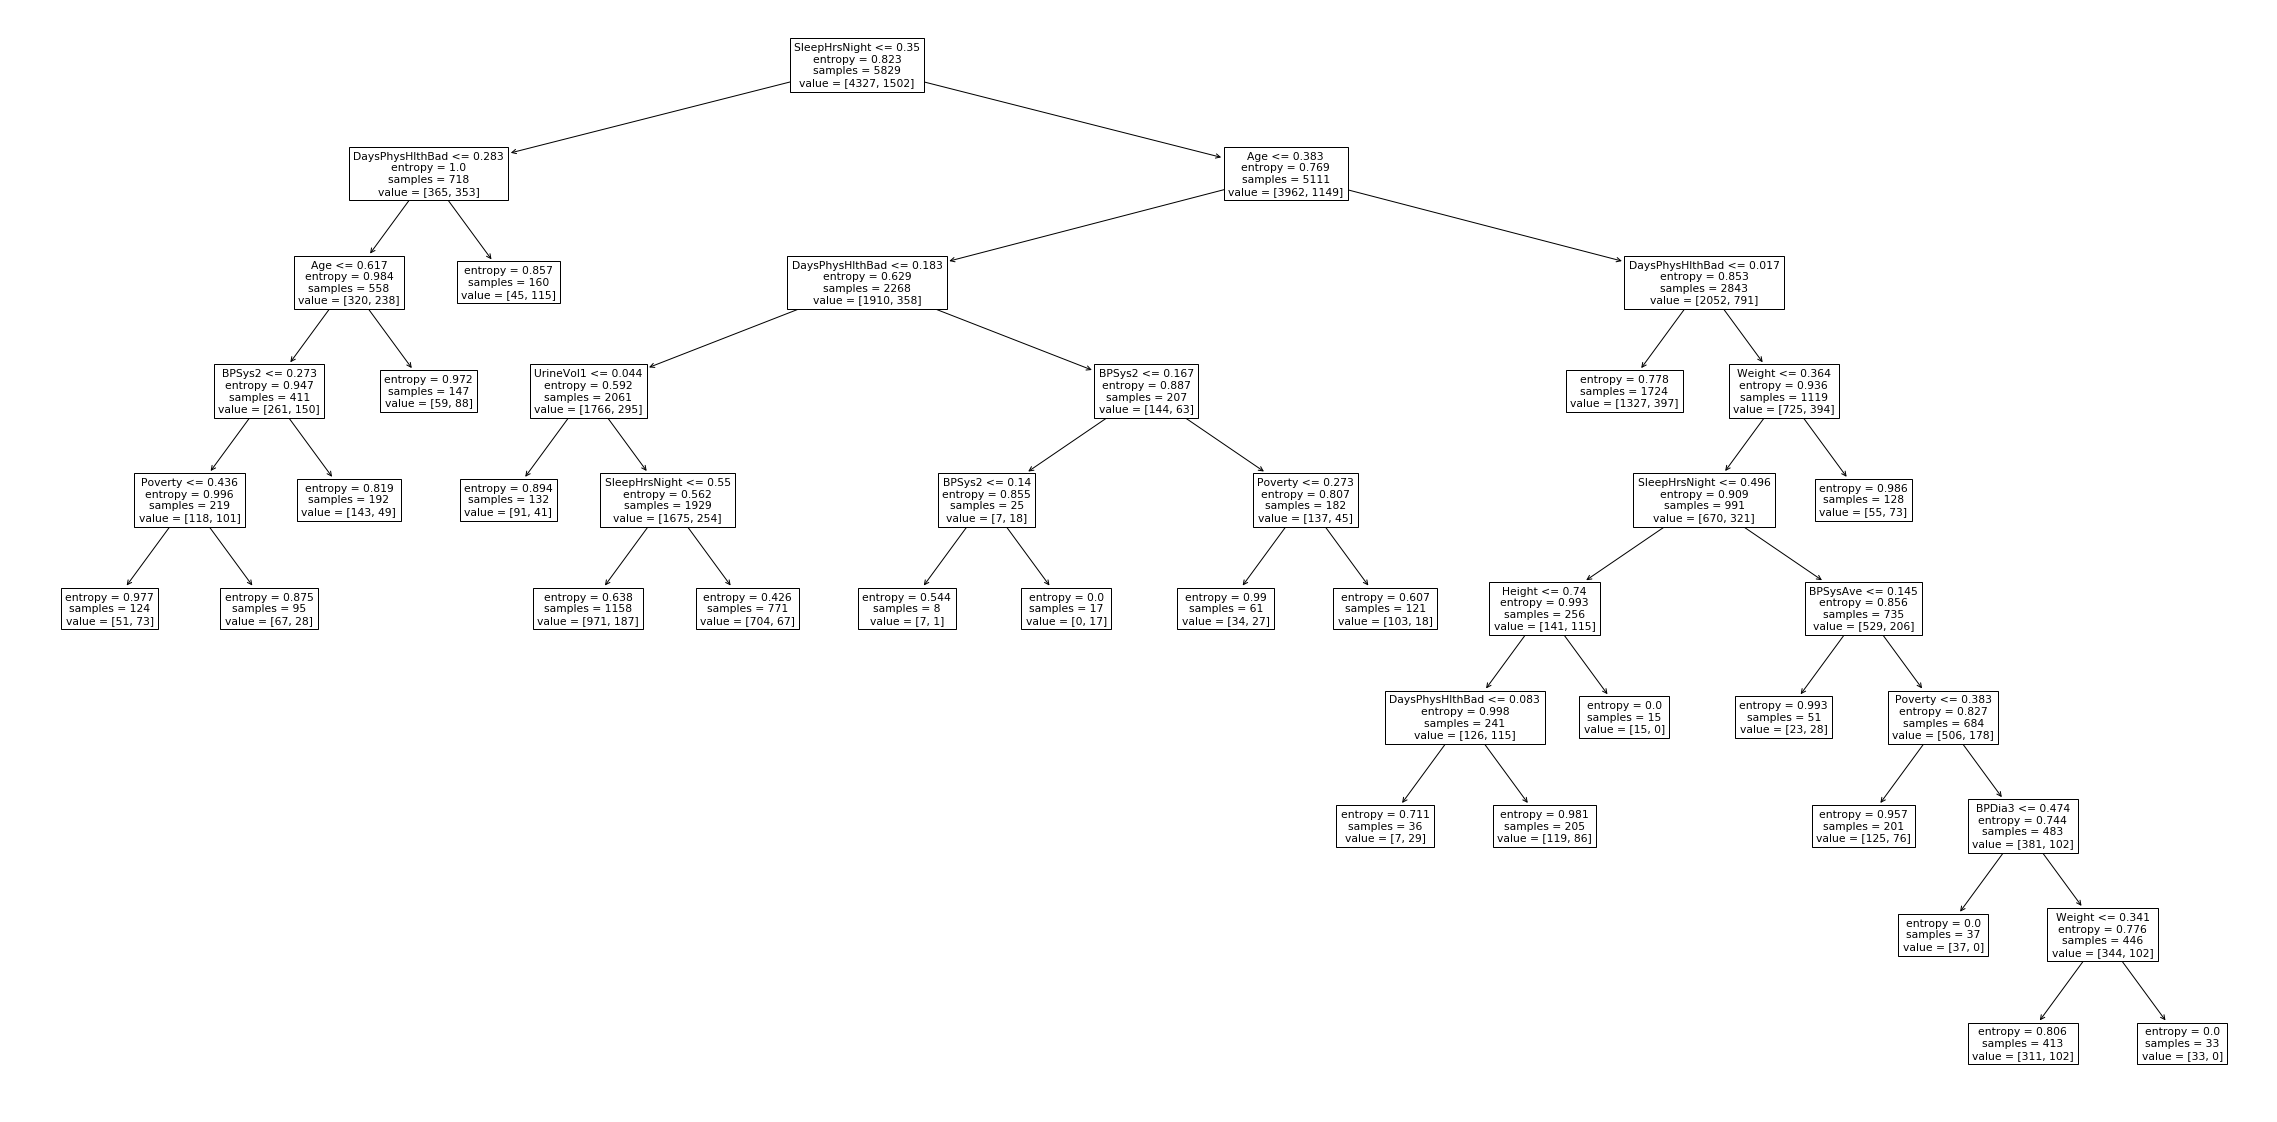

In [90]:
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf, feature_names = _X.columns)
from matplotlib import pyplot as plt

plt.savefig('TreeImage.png')
plt.show()

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1472
           1       0.53      0.24      0.33       471

    accuracy                           0.76      1943
   macro avg       0.66      0.59      0.59      1943
weighted avg       0.73      0.76      0.73      1943

-------------------------- Confusion matrix --------------------------



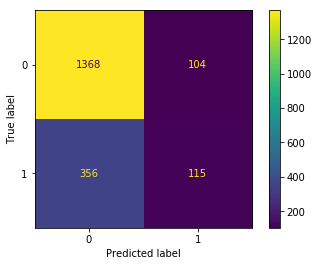

In [91]:
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')

print(metrics.classification_report(y_test, y_pred))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  

#### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=100, criterion="gini",bootstrap=True, random_state=42)
RFclf = RFclf.fit(X_train, y_train)
y_pred = RFclf.predict(X_test) 

----------------------- Classification Report ------------------------

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1472
           1       0.92      0.62      0.74       471

    accuracy                           0.90      1943
   macro avg       0.91      0.80      0.84      1943
weighted avg       0.90      0.90      0.89      1943

-------------------------- Confusion matrix --------------------------



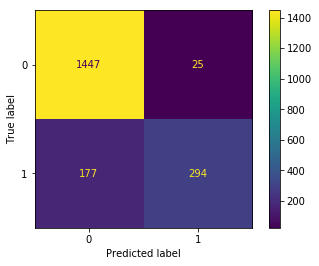

In [97]:
from sklearn import metrics
print('----------------------- Classification Report ------------------------\n')

print(metrics.classification_report(y_test, y_pred))

print('-------------------------- Confusion matrix --------------------------\n')
%matplotlib inline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RFclf, X_test, y_test)  